In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import FloatType
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.stat import ChiSquareTest
import seaborn as sns; sns.set_theme()
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark = SparkSession.builder.appName("Dataframe_practice").getOrCreate()
df = spark.read.csv('data.csv', header=True)
dfWop = df

In [2]:
for c in df.columns:
     print(df.select(count(when(col(c).isNull(), c)).alias(c)).collect()[0])

Row(customerID=253)
Row(gender=235)
Row(SeniorCitizen=266)
Row(Partner=225)
Row(Dependents=242)
Row(tenure=225)
Row(PhoneService=269)
Row(MultipleLines=263)
Row(InternetService=230)
Row(OnlineSecurity=230)
Row(OnlineBackup=243)
Row(DeviceProtection=254)
Row(TechSupport=264)
Row(StreamingTV=249)
Row(StreamingMovies=219)
Row(Contract=230)
Row(PaperlessBilling=257)
Row(PaymentMethod=246)
Row(MonthlyCharges=243)
Row(TotalCharges=251)
Row(Label=208)


In [2]:
df = df.filter(~(col('label').isNull()))
df = df.drop('customerID')
df = df.na.drop("all")
df = df.dropDuplicates()
dfWop = dfWop.na.drop("any")

for i in df.columns:
    if i not in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
        df = df.fillna(value=df.agg(F.max(i)).collect()[0][0], subset=i)
        
    elif i in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        val = round(df.agg(F.avg(i)).collect()[0][0], 1)
        df = df.na.fill(value=str(val), subset=i)
        df = df.withColumn(i, df[i].cast(FloatType()))
        dfWop = dfWop.withColumn(i, dfWop[i].cast(FloatType()))
        
    elif i == 'SeniorCitizen':
        df = df.fillna(value=df.groupby('SeniorCitizen').count().sort('count').collect()[-1][0], subset=i)
        
df = df.dropDuplicates()

In [36]:
for c in df.columns:
     print(df.select(count(when(col(c).isNull(), c)).alias(c)).collect()[0])

Row(gender=0)
Row(SeniorCitizen=0)
Row(Partner=0)
Row(Dependents=0)
Row(tenure=0)
Row(PhoneService=0)
Row(MultipleLines=0)
Row(InternetService=0)
Row(OnlineSecurity=0)
Row(OnlineBackup=0)
Row(DeviceProtection=0)
Row(TechSupport=0)
Row(StreamingTV=0)
Row(StreamingMovies=0)
Row(Contract=0)
Row(PaperlessBilling=0)
Row(PaymentMethod=0)
Row(MonthlyCharges=0)
Row(TotalCharges=0)
Row(Label=0)


In [37]:
for c in dfWop.columns:
     print(dfWop.select(count(when(col(c).isNull(), c)).alias(c)).collect()[0])

Row(customerID=0)
Row(gender=0)
Row(SeniorCitizen=0)
Row(Partner=0)
Row(Dependents=0)
Row(tenure=0)
Row(PhoneService=0)
Row(MultipleLines=0)
Row(InternetService=0)
Row(OnlineSecurity=0)
Row(OnlineBackup=0)
Row(DeviceProtection=0)
Row(TechSupport=0)
Row(StreamingTV=0)
Row(StreamingMovies=0)
Row(Contract=0)
Row(PaperlessBilling=0)
Row(PaymentMethod=0)
Row(MonthlyCharges=0)
Row(TotalCharges=0)
Row(Label=0)


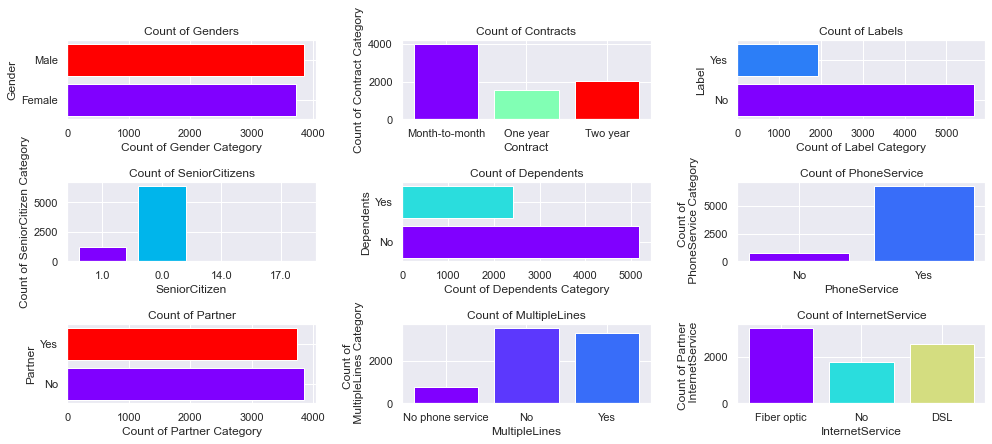

In [45]:
#Count of Gender 
itemList = {}
for i in df.groupby('gender').count().collect():
    itemList[i[0]] = i[1]
    
fig = plt.figure(figsize=(15, 6))
plt.subplot(3,3,1)
color = plt.cm.rainbow(np.linspace(0, 1, 2))
plt.xlabel('Count of Gender Category')
plt.ylabel('Gender')
plt.title('Count of Genders')
plt.barh(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of Contract
itemList = {}
for i in df.groupby('Contract').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,2)
color = plt.cm.rainbow(np.linspace(0, 1, 3))
plt.ylabel('Count of Contract Category')
plt.xlabel('Contract')
plt.title('Count of Contracts')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of Label
itemList = {}
for i in df.groupby('Label').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,3)
color = plt.cm.rainbow(np.linspace(0, 1, 7))
plt.ylabel('Label')
plt.xlabel('Count of Label Category')
plt.title('Count of Labels')
plt.barh(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of SeniorCitizen
itemList = {}
for i in df.groupby('SeniorCitizen').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,4)
color = plt.cm.rainbow(np.linspace(0, 1, 5))
plt.ylabel('Count of SeniorCitizen Category')
plt.xlabel('SeniorCitizen')
plt.title('Count of SeniorCitizens')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of Dependents
itemList = {}
for i in df.groupby('Dependents').count().collect():
    itemList[i[0]] = i[1]
    
plt.subplot(3,3,5)
color = plt.cm.rainbow(np.linspace(0, 1, 4))
plt.ylabel('Dependents')
plt.xlabel('Count of Dependents Category')
plt.title('Count of Dependents')
plt.barh(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of PhoneService
itemList = {}
for i in df.groupby('PhoneService').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,6)
color = plt.cm.rainbow(np.linspace(0, 1, 8))
plt.ylabel('Count of \n PhoneService Category')
plt.xlabel('PhoneService')
plt.title('Count of PhoneService')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of Partner
itemList = {}
for i in df.groupby('Partner').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,7)
color = plt.cm.rainbow(np.linspace(0, 1, 2))
plt.ylabel('Partner')
plt.xlabel('Count of Partner Category')
plt.title('Count of Partner')
plt.barh(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of MultipleLines
itemList = {}
for i in df.groupby('MultipleLines').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,8)
color = plt.cm.rainbow(np.linspace(0, 1, 15))
plt.ylabel('Count of \n MultipleLines Category')
plt.xlabel('MultipleLines')
plt.title('Count of MultipleLines')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of InternetService
itemList = {}
for i in df.groupby('InternetService').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,9)
color = plt.cm.rainbow(np.linspace(0, 1, 4))
plt.ylabel('Count of Partner \n InternetService')
plt.xlabel('InternetService')
plt.title('Count of InternetService')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.35)
plt.show()

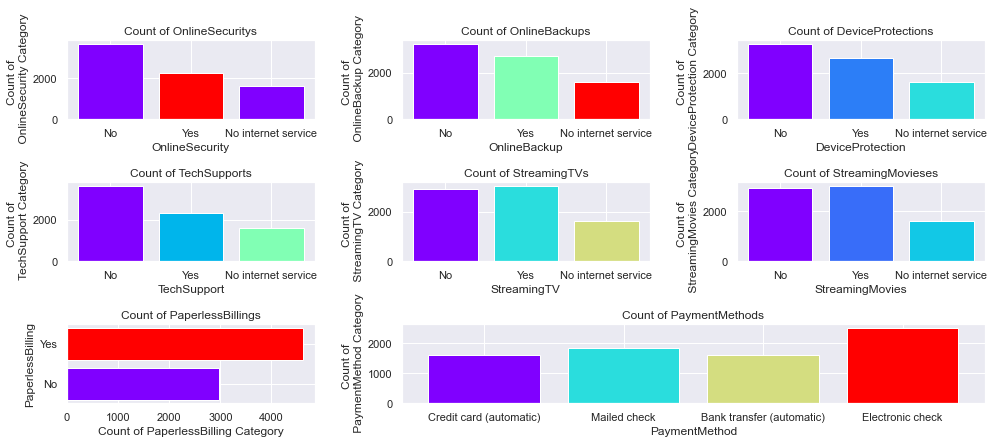

In [46]:
#Count of OnlineSecurity 
itemList = {}
for i in df.groupby('OnlineSecurity').count().collect():
    itemList[i[0]] = i[1]
    
fig = plt.figure(figsize=(15, 6))
plt.subplot(3,3,1)
color = plt.cm.rainbow(np.linspace(0, 1, 2))
plt.xlabel('OnlineSecurity')
plt.ylabel('Count of \n OnlineSecurity Category')
plt.title('Count of OnlineSecuritys')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)

#Count of OnlineBackup
itemList = {}
for i in df.groupby('OnlineBackup').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,2)
color = plt.cm.rainbow(np.linspace(0, 1, 3))
plt.ylabel('Count of \n OnlineBackup Category')
plt.xlabel('OnlineBackup')
plt.title('Count of OnlineBackups')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of DeviceProtection
itemList = {}
for i in df.groupby('DeviceProtection').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,3)
color = plt.cm.rainbow(np.linspace(0, 1, 7))
plt.ylabel('Count of \n DeviceProtection Category')
plt.xlabel('DeviceProtection')
plt.title('Count of DeviceProtections')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of TechSupport
itemList = {}
for i in df.groupby('TechSupport').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,4)
color = plt.cm.rainbow(np.linspace(0, 1, 5))
plt.ylabel('Count of \n TechSupport Category')
plt.xlabel('TechSupport')
plt.title('Count of TechSupports')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of StreamingTV
itemList = {}
for i in df.groupby('StreamingTV').count().collect():
    itemList[i[0]] = i[1]
    
plt.subplot(3,3,5)
color = plt.cm.rainbow(np.linspace(0, 1, 4))
plt.ylabel('Count of \n StreamingTV Category')
plt.xlabel('StreamingTV')
plt.title('Count of StreamingTVs')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of StreamingMovies
itemList = {}
for i in df.groupby('StreamingMovies').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,6)
color = plt.cm.rainbow(np.linspace(0, 1, 8))
plt.ylabel('Count of \n StreamingMovies Category')
plt.xlabel('StreamingMovies')
plt.title('Count of StreamingMovieses')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of PaperlessBilling
itemList = {}
for i in df.groupby('PaperlessBilling').count().collect():
    itemList[i[0]] = i[1]

plt.subplot(3,3,7)
color = plt.cm.rainbow(np.linspace(0, 1, 2))
plt.ylabel('PaperlessBilling')
plt.xlabel('Count of PaperlessBilling Category')
plt.title('Count of PaperlessBillings')
plt.barh(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)


#Count of PaymentMethod
itemList = {}
for i in df.groupby('PaymentMethod').count().collect():
    itemList[i[0]] = i[1]

axes1 = plt.subplot2grid((3, 3), (2,1), colspan = 2)
color = plt.cm.rainbow(np.linspace(0, 1, 4))
plt.ylabel('Count of \n PaymentMethod Category')
plt.xlabel('PaymentMethod')
plt.title('Count of PaymentMethods')
plt.bar(np.array(list(itemList.keys())), np.array(list(itemList.values())), align='center', color=color)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.35)
plt.show()

In [3]:
print(df.groupby('SeniorCitizen').count().sort('count').collect())
df = df.filter('SeniorCitizen < 14')
print(df.groupby('SeniorCitizen').count().sort('count').collect())

[Row(SeniorCitizen='17.0', count=1), Row(SeniorCitizen='14.0', count=8), Row(SeniorCitizen='1.0', count=1217), Row(SeniorCitizen='0.0', count=6361)]
[Row(SeniorCitizen='1.0', count=1217), Row(SeniorCitizen='0.0', count=6361)]


# Calculating Correlation (at first categorical attribute then numerical attribute)

Chisquare test for correlation between categorical attribute

In [27]:
genInd = StringIndexer(inputCol="gender", outputCol="genInd")
genInd = genInd.fit(df).transform(df)
genOHE = OneHotEncoder(inputCol='genInd',outputCol='genOHE')
genOHE = genOHE.fit(genInd).transform(genInd)
genVec = VectorAssembler(inputCols=['genOHE'], outputCol='genVec')
genVec = genVec.transform(genOHE)

labInd = StringIndexer(inputCol="Label", outputCol="labInd")
labInd = labInd.fit(df).transform(df)
lab = [i[0] for i in labInd.select('labInd').collect()]
gen = [i[0] for i in genVec.select('genVec').collect()]

data = list(zip(lab, gen))
df1 = spark.createDataFrame(data, ['label', 'gender'])
r = ChiSquareTest.test(df1, 'gender', 'label').head()

print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.05729946085420601]
degreesOfFreedom: [1]
statistics: [3.6138750711807086]


In [8]:
colInd = []
colistr = []
colOHE = []
colInt = []
for colm,types in df.dtypes:
    if types == 'string':
        colistr.append(colm)
        colInd.append(colm + 'Ind')
        colOHE.append(colm + 'OHE')
    else:
        colInt.append(colm)

#Convert Categorical data to Numerical data
sindex = StringIndexer(inputCols=colistr, outputCols=colInd)
Ohe = OneHotEncoder(inputCols=colInd, outputCols=colOHE)

#Creating a vector of all attributes(without Label)
colOHE.remove('LabelOHE')
colList = colOHE + colInt
colVec = VectorAssembler(inputCols=colList, outputCol='features')

ind = sindex.fit(df).transform(df)
onehot = Ohe.fit(ind).transform(ind)
vec = colVec.transform(onehot)

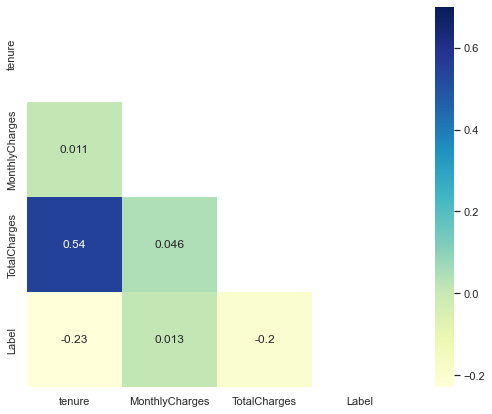

In [5]:
myList = []
for i,j,k,m in zip(df.select('tenure').collect(), df.select('MonthlyCharges').collect(), df.select('TotalCharges').collect(), vec.select('labelInd').collect()):
    myList.append((i[0], j[0], k[0], m[0]))
dfCorr = spark.createDataFrame(myList, ['tenure','MonthlyCharges', 'TotalCharges', 'Label'])
corrmat = dfCorr.toPandas().corr()
  
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corrmat, mask=mask, vmax=0.7, square=True, cmap="YlGnBu", annot=True)

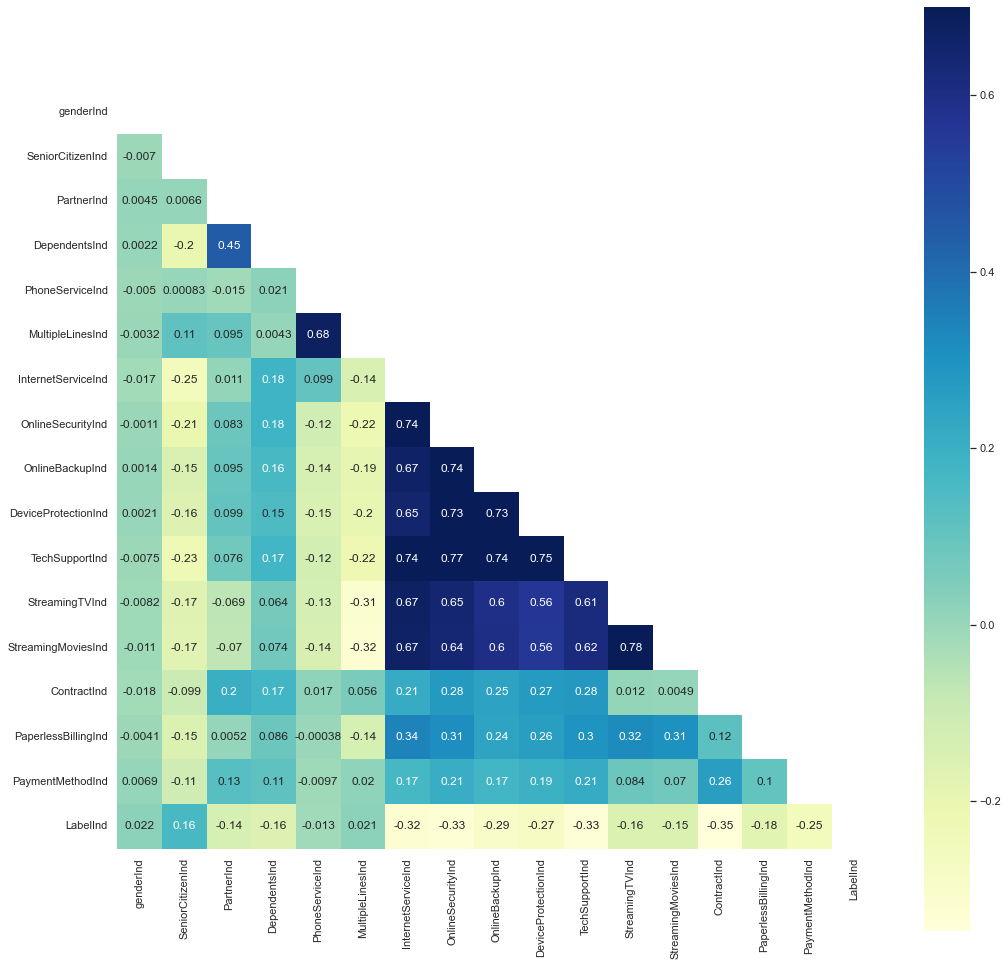

In [67]:
corrmat = vec.select(['genderInd', 'SeniorCitizenInd', 'PartnerInd', 'DependentsInd', 'PhoneServiceInd', 'MultipleLinesInd', 'InternetServiceInd', 'OnlineSecurityInd','OnlineBackupInd','DeviceProtectionInd','TechSupportInd','StreamingTVInd','StreamingMoviesInd','ContractInd','PaperlessBillingInd','PaymentMethodInd','LabelInd']).toPandas().corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 17))
    ax = sns.heatmap(corrmat, mask=mask, vmax=0.7, square=True, cmap="YlGnBu", annot=True)

In [9]:
#Training Logistic Regression Model with Preprocessing Data
trainDF, testDF = vec.select(['features', 'LabelInd']).randomSplit([.8, .2], seed=250)

logReg = LogisticRegression(featuresCol='features',labelCol='LabelInd')
fitModel = logReg.fit(trainDF)
results = fitModel.transform(testDF)

myEval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='LabelInd')
AUC = myEval.evaluate(results)
print("AUC score is : ",AUC)

AUC score is :  0.7349586288416076


In [18]:
#Training Logistic Regression Model without Preprocessing Data
colInd = []
colistr = []
colOHE = []
colInt = []
for colm,types in dfWop.dtypes:
    if types == 'string':
        colistr.append(colm)
        colInd.append(colm + 'Ind')
        colOHE.append(colm + 'OHE')
    else:
        colInt.append(colm)

sWop = StringIndexer(inputCols=colistr, outputCols=colInd)
OheWop = OneHotEncoder(inputCols=colInd, outputCols=colOHE)
colInd.remove('LabelInd')
colList = colInd + colInt
colVecWop = VectorAssembler(inputCols=colList, outputCol='features')

indWop = sWop.fit(dfWop).transform(dfWop)
onehotWop = OheWop.fit(indWop).transform(indWop)
vecWop = colVecWop.transform(onehotWop)

trainDF, testDF = vecWop.select(['features', 'LabelInd']).randomSplit([.8, .2], seed=250)

logReg = LogisticRegression(featuresCol='features',labelCol='LabelInd')
fitModel = logReg.fit(trainDF)
results = fitModel.transform(testDF)

myEval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='LabelInd')
AUC = myEval.evaluate(results)
print("AUC score is : ",AUC)

AUC score is :  0.6054141099844311
